In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('london_merged.csv')

df['hours'] = df.timestamp.str[11:13]
df['data'] = df.timestamp.str[0:10]
df.hours = pd.to_numeric(df.hours)

categorical_data = ['weather_code', 'season']
df_encode = pd.get_dummies(data = df, prefix = 'SCO', prefix_sep = '_', columns = categorical_data, drop_first = True, dtype = 'int8')
df_data = pd.DataFrame(df.groupby(['data'])['cnt'].sum().reset_index())
print(df.head())
print(df_data.head(10))
print(df_data.describe())


             timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0  2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1  2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2  2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3  2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4  2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season  hours        data  
0         0.0         1.0     3.0      0  2015-01-04  
1         0.0         1.0     3.0      1  2015-01-04  
2         0.0         1.0     3.0      2  2015-01-04  
3         0.0         1.0     3.0      3  2015-01-04  
4         0.0         1.0     3.0      4  2015-01-04  
         data    cnt
0  2015-01-04   9234
1  2015-01-05  20372
2  2015-01-06  20613
3  2015-01-07  21064
4  2015-01-08  15601
5  2015-01-09  22104
6  2015-01-10  14709
7  2015-01-11  14575
8  2015-01-12  17199
9  2015-01-13  

Text(0.5, 1.0, 'Scatter plot of Rent vs hours')

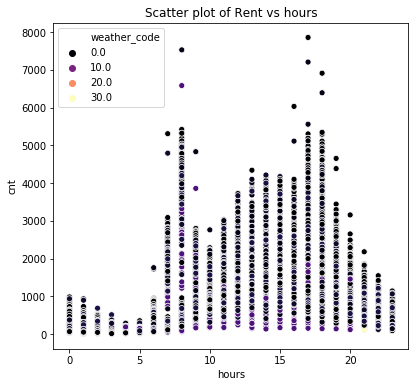

In [3]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='hours',y='cnt',data=df,palette='magma',hue='weather_code',ax=ax)
ax.set_title('Scatter plot of Rent vs hours')




In [4]:
print(df.season.unique())
seasons = ['Winter', 'Spring', 'Summer', ' Autum']

[3. 0. 1. 2.]


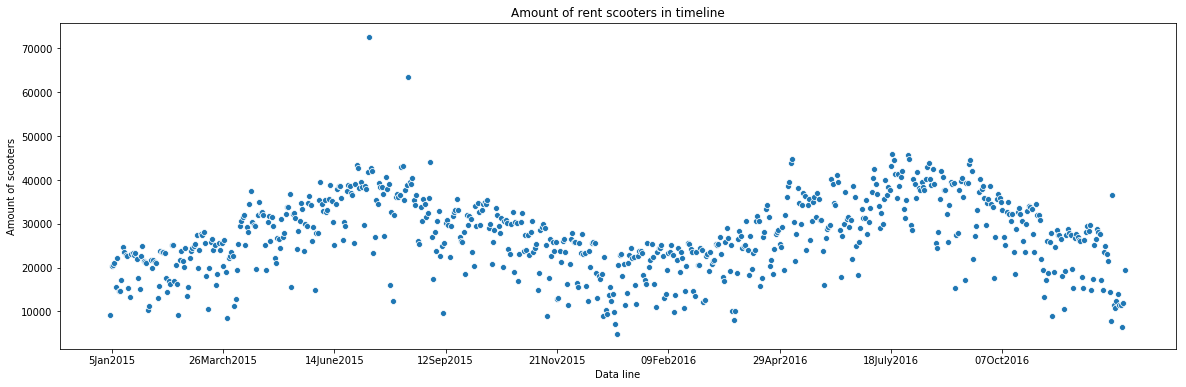

In [5]:
f = plt.figure(figsize=(20,6))
x = sns.scatterplot(data = df_data, x = 'data', y = 'cnt')

x.xaxis.set_ticks(np.arange(1, 720,80))
x.xaxis.set_ticklabels(['5Jan2015','26March2015','14June2015','12Sep2015','21Nov2015', '09Feb2016','29Apr2016','18July2016','07Oct2016'])
x.set_xlabel('Data line')
x.set_ylabel('Amount of scooters')
x.set_title('Amount of rent scooters in timeline')

plt.show()



In [6]:
df_hour = pd.DataFrame(df.groupby(['hours','season'])['cnt'].sum().reset_index())
print(df_hour.head())

   hours  season    cnt
0      0     0.0  45556
1      0     1.0  75296
2      0     2.0  52032
3      0     3.0  37517
4      1     0.0  29591


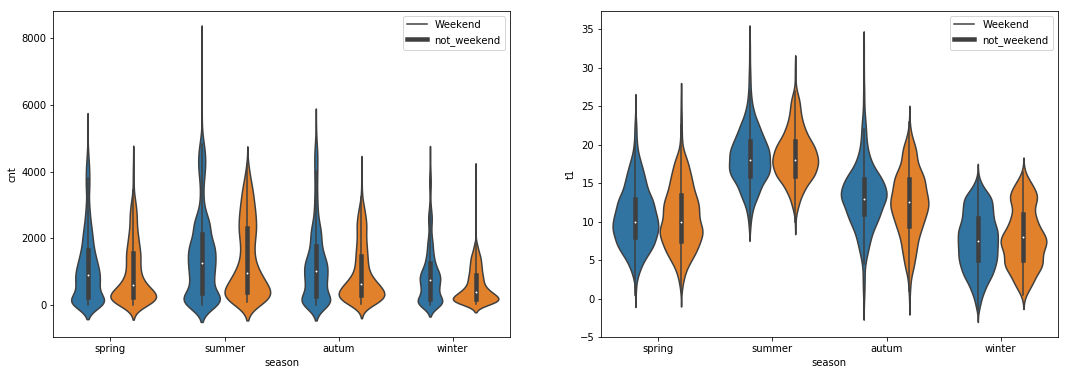

In [24]:
seasons = ['spring', 'summer', 'autum', 'winter']
f = plt.figure(figsize=(18,6))
ax = plt.subplot(121)
sns.violinplot(x = 'season', y = 'cnt', hue= 'is_weekend', data = df,  ax=ax)
ax.set_xticks(range(4))
ax.set_xticklabels(['spring', 'summer', 'autum', 'winter'])
ax.legend(['Weekend', 'not_weekend'])

ax = plt.subplot(122)
sns.violinplot(x = 'season', y = 't1', hue = 'is_weekend', data = df)
ax.set_xticks(range(4))
ax.set_xticklabels(['spring', 'summer', 'autum', 'winter'])
ax.legend(['Weekend', 'not_weekend'])


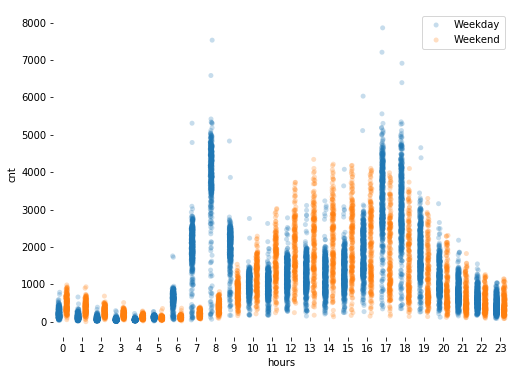

In [39]:
f = plt.figure(figsize=(18,6))
ax = plt.subplot(121)
sns.despine(bottom=True, left=True)
sns.stripplot(x="hours", y="cnt", hue = 'is_weekend',
              data=df, dodge=True, alpha=.25, zorder=1)
ax.legend(['Weekday','Weekend'])